In [14]:
import numpy as np
import scipy
import scipy.spatial

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white", palette="pastel")

## Aula 02 - Distância e Similaridade

### Euclidiana

In [4]:
pa = np.asarray([23, 2, 2])
pb = np.asarray([40, 10, 1])

pa - pb

array([-17,  -8,   1])

A função `np.linalg.norm` (https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) implementa $$[\sum abs(x)^{ord}]^{\frac{1}{ord}}$$

onde `ord` é um parâmetro, por padrão igual a 2.

Assim, o código abaixo calcula a distância euclideana entre os vetores `pa` e `pb`

In [5]:
np.linalg.norm(pa-pb)

18.81488772222678

### Problemas

#### 1. Escala

Repare como o fato de uma das dimensões ter uma escala muito maior do que as demais faz com que a distância entre os vetores seja pouco afetada por mudanças nessas dimensões de valores menores.

In [6]:
pa = np.asarray([1, 1, 3])
pb = np.asarray([80, 1, 1])
np.linalg.norm(pa-pb)

79.02531240052139

In [7]:
pa = np.asarray([1, 1, 3])
pb = np.asarray([80, 5, 1])
np.linalg.norm(pa-pb)

79.12648102879339

In [8]:
pa = np.asarray([1, 1, 3])
pb = np.asarray([80, 5, 2])
np.linalg.norm(pa-pb)

79.10752176626443

#### Maldição da dimensionalidade

In [77]:
M = np.random.normal(0, 1, (5, 3))

In [169]:
M

array([[ 0.11141985,  0.09187292,  0.59756961],
       [ 2.21711167, -0.33538136, -0.44825497],
       [-0.50932077, -0.10737255,  1.40540813],
       [-2.53933553,  0.60415437, -0.33705056],
       [-0.77784774, -1.62468154,  0.11726113]])

In [170]:
dist_mtx = scipy.spatial.distance_matrix(M, M, p=2)
dist_mtx

array([[0.        , 2.38960944, 1.03808514, 2.8570004 , 1.99199707],
       [2.38960944, 0.        , 3.30476758, 4.84962718, 3.30936328],
       [1.03808514, 3.30476758, 0.        , 2.76828336, 2.00839637],
       [2.8570004 , 4.84962718, 2.76828336, 0.        , 2.87696852],
       [1.99199707, 3.30936328, 2.00839637, 2.87696852, 0.        ]])

In [171]:
max_dist = np.max(dist_mtx, 1)
max_dist

array([2.8570004 , 4.84962718, 3.30476758, 4.84962718, 3.30936328])

In [172]:
np.fill_diagonal(dist_mtx, 999)
min_dist = np.min(dist_mtx, 1)
min_dist

array([1.03808514, 2.38960944, 1.03808514, 2.76828336, 1.99199707])

In [173]:
dist_ratio = max_dist / min_dist
dist_ratio

array([2.75218313, 2.02946435, 3.18352268, 1.7518536 , 1.66132939])

Text(0, 0.5, 'Ratio Max/Min')

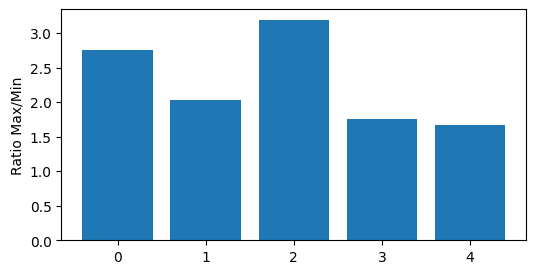

In [82]:
y_pos = np.arange(len(dist_ratio))
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.bar(y_pos, dist_ratio)
ax.set_ylabel('Ratio Max/Min')

In [83]:
def show_ratio_plot(n_samples, n_dimensions):
    M = np.random.normal(0, 1, (n_samples, n_dimensions))
    dist_mtx = scipy.spatial.distance_matrix(M, M, p=2)
    max_dist = np.max(dist_mtx, 1)
    np.fill_diagonal(dist_mtx, 999)
    min_dist = np.min(dist_mtx, 1)
    dist_ratio = max_dist / min_dist

    y_pos = np.arange(len(dist_ratio))
    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.bar(y_pos, dist_ratio)
    ax.set_ylabel('Ratio Max/Min')

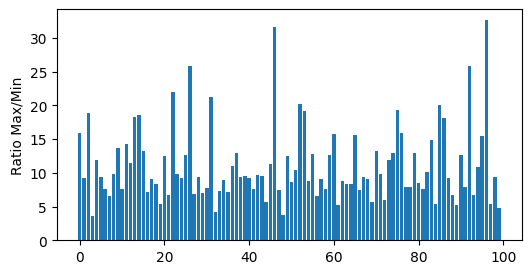

In [84]:
show_ratio_plot(100, 3)

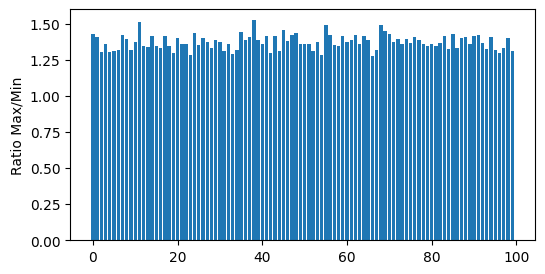

In [85]:
show_ratio_plot(100, 100)

## Aula 03 - KMeans

### Exemplo 01 - USArrests

In [143]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [202]:
df = pd.read_csv("USArrests.csv", sep=',', index_col=0)
df.head(6)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


#### EDA

In [204]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [206]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


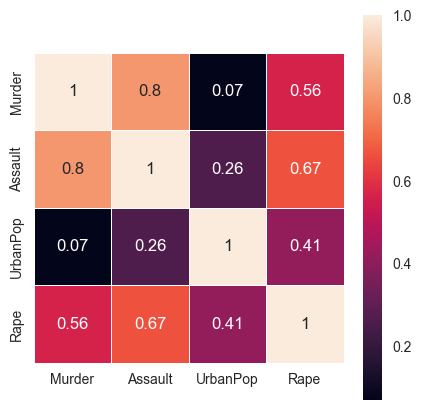

In [207]:
corr = df.corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, square=True, linewidths=.5, annot=True);

In [218]:
def plot_dist_matrix(df, figsize=(12, 10)):
    dist_mtx = scipy.spatial.distance_matrix(df, df, p=2)
    dist_mtx_df = pd.DataFrame(dist_mtx, index=df.index, columns=df.index)
    f, ax = plt.subplots(figsize=figsize)
    sns.heatmap(dist_mtx_df, center=0, square=True, annot=False);

In [ ]:
# normalized_df = (df-df.mean())/df.std()
# normalized_df = (df-df.min())/(df.max()-df.min())

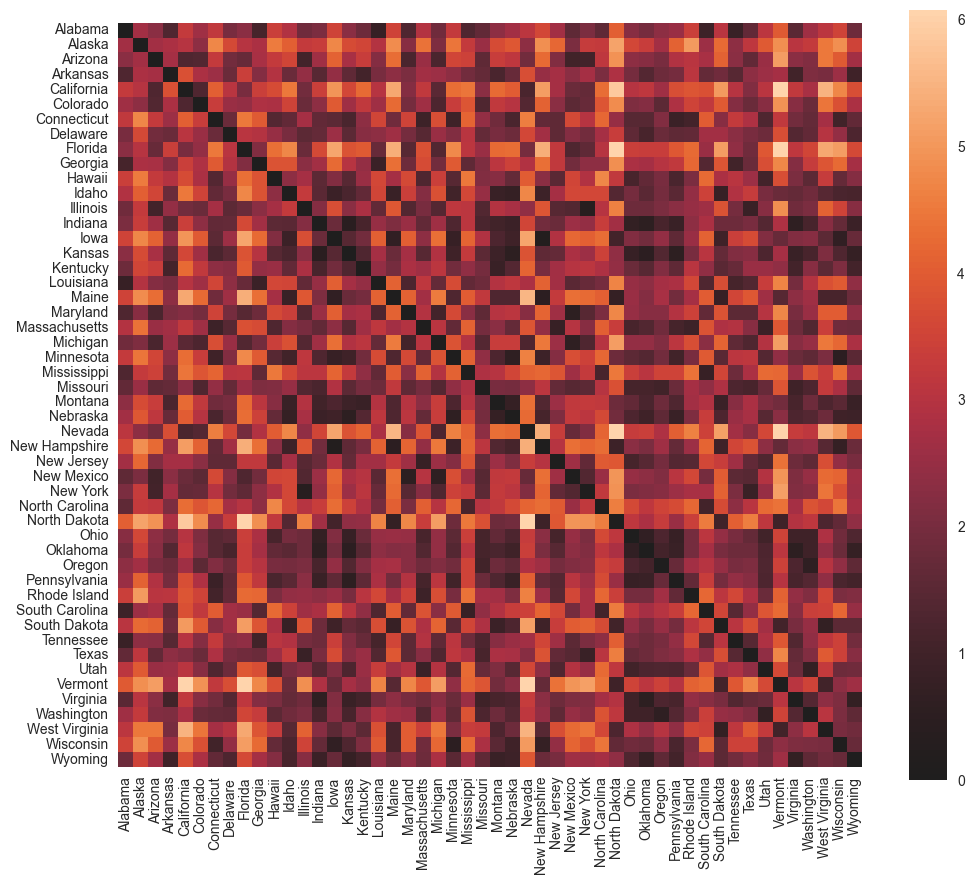

In [219]:
plot_dist_matrix((df-df.mean())/df.std())

#### Escolha do número de clusters

In [151]:
normalized_df = (df-df.mean())/df.std()
normalized_df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.242564,0.782839,-0.520907,-0.003416
Alaska,0.507862,1.106823,-1.211764,2.484203
Arizona,0.071633,1.478803,0.998980,1.042878
Arkansas,0.232349,0.230868,-1.073593,-0.184917
California,0.278268,1.262814,1.758923,2.067820


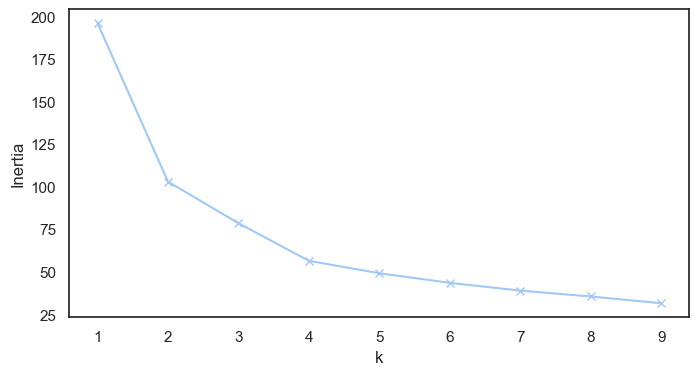

In [161]:
def plot_inertia(df, kmin=1, kmax=10, figsize=(8, 4)):

    _range = range(kmin, kmax)
    inertias = []
    for k in _range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=figsize)
    plt.plot(_range, inertias, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.show()
    
plot_inertia(normalized_df)

##### Extra!

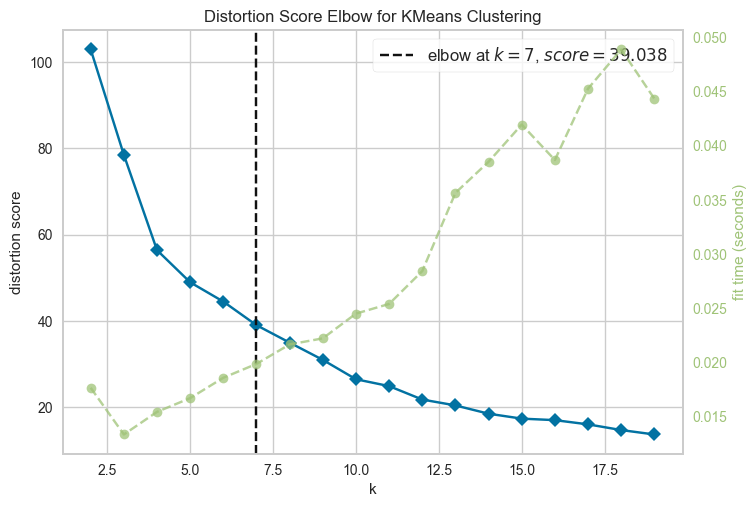

In [168]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(normalized_df); 
visualizer.poof();

#### Clustering

In [176]:
kmeans = KMeans(n_clusters=4)
k_fit = kmeans.fit(normalized_df)

In [148]:
k_fit.cluster_centers_

array([[-0.48943754, -0.38260013,  0.57582979, -0.26165379],
       [-0.96154072, -1.106601  , -0.93010687, -0.96676331],
       [ 0.6950701 ,  1.03944141,  0.72263703,  1.27693964],
       [ 1.41188984,  0.8743346 , -0.81452109,  0.01927104]])

In [149]:
clusters = k_fit.labels_
clusters

array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [160]:
cluster_df = df.copy()
cluster_df['cluster'] = clusters
cluster_df.head()

,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236,58,21.2,3
Alaska,10.0,263,48,44.5,2
Arizona,8.1,294,80,31.0,2
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,2


In [162]:
cluster_df.groupby('cluster').mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.656250,138.875000,73.875000,18.781250
1,3.600000,78.538462,52.076923,12.176923
2,10.815385,257.384615,76.000000,33.192308
3,13.937500,243.625000,53.750000,21.412500


In [174]:
def plot_cluster_points(df, kmeans):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(kmeans.labels_)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data)

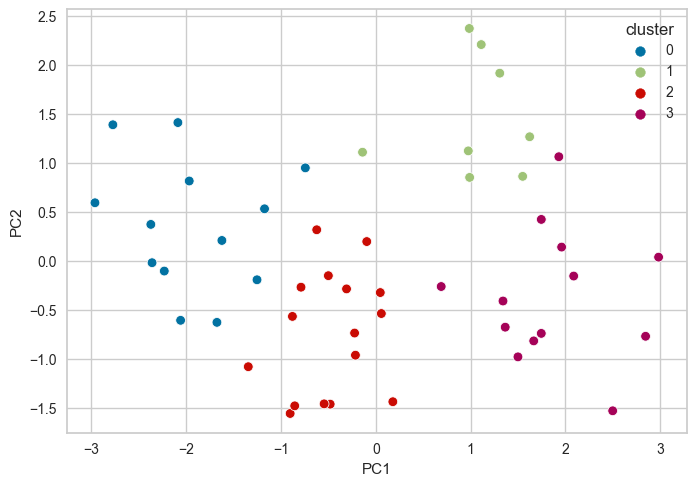

In [177]:
plot_cluster_points(normalized_df, kmeans)

## Aula 04 - KMeans aplicado a imagens

### Color quantization

Processo de reduzir o número de cores representadas em uma imagem com o objetivo de comprimir seu tamanho.

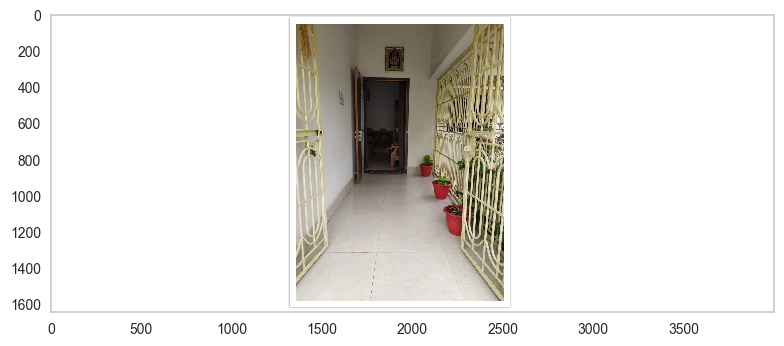

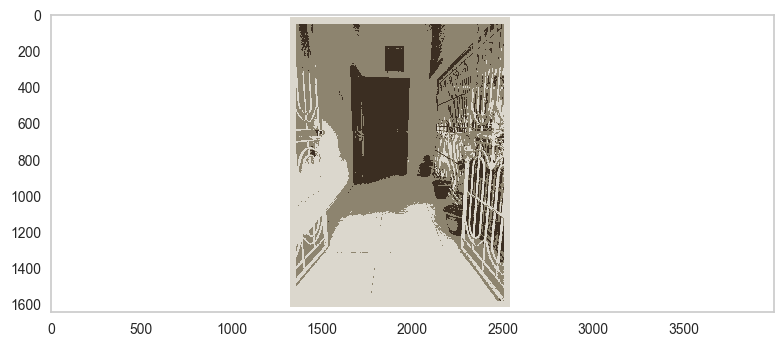

In [246]:
from skimage import io

#Read the image
image = io.imread('door_img.png')
io.imshow(image)
plt.grid(False)
io.show()

#Dimension of the original image
rows = image.shape[0]
cols = image.shape[1]

#Flatten the image
image = image.reshape(rows*cols, 4)

#Implement k-means clustering to form k clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(image)

#Replace each pixel value with its nearby centroid
compressed_image = kmeans.cluster_centers_[kmeans.labels_]
compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)

#Reshape the image to original dimension
compressed_image = compressed_image.reshape(rows, cols, 4)

#Save and display output image
# io.imsave('compressed_image_64.png', compressed_image)
io.imshow(compressed_image)
plt.grid(False)
io.show()

## Aula 05 - Clusterização Hierárquica

In [247]:
import scipy.cluster.hierarchy as sch

df = pd.read_csv("USArrests.csv", sep=',', index_col=0)
df.head(6)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


In [269]:
sch.linkage?

Text(0, 0.5, 'Euclidean Distance')

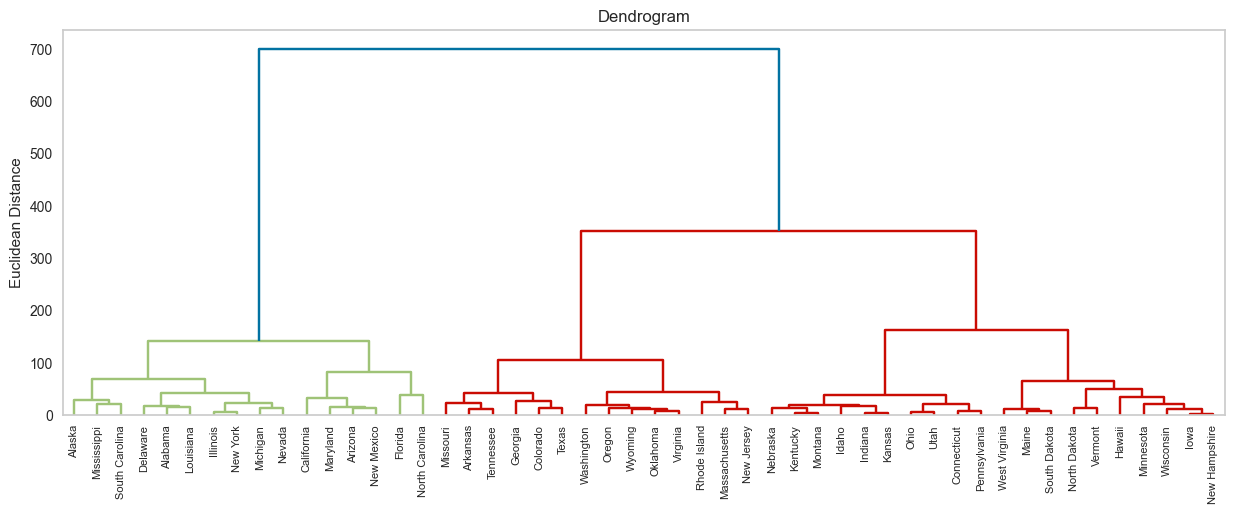

In [257]:
plt.figure(figsize=(15, 5))
plt.grid(False)
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'), labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')

In [258]:
def plot_dendrogram(model, **kwargs):

    # Children of hierarchical clustering
    children = model.children_

    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])

    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

In [265]:
hc_pred

array([0, 0, 0, 2, 0, 2, 3, 0, 0, 2, 1, 3, 0, 3, 1, 3, 3, 0, 1, 0, 2, 0,
       1, 0, 2, 3, 3, 0, 1, 2, 0, 0, 0, 1, 3, 2, 2, 3, 2, 0, 1, 2, 2, 3,
       1, 2, 2, 1, 1, 2])

Text(0, 0.5, 'Euclidean Distance')

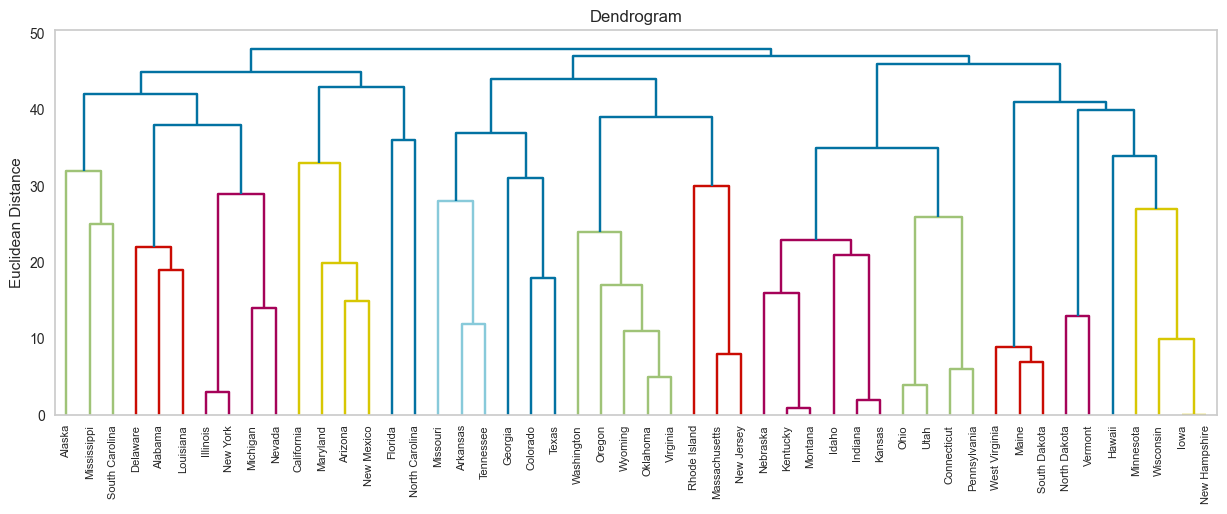

In [268]:
# from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=1, affinity = "euclidean",
                             linkage = 'ward')
hc_pred = hc.fit_predict(df)

plt.figure(figsize=(15, 5))
plt.grid(False)
plot_dendrogram(hc, labels=df.index)
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')